# # # paths to be used if executed on jupyter:
train = pd.read_csv('train.csv'), 
test = pd.read_csv('test.csv')

In [1]:
# Imports for data loading and array math
import numpy as np
import pandas as pd

# Imports for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib as mpl
%matplotlib inline

# Import for data split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [3]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')


# Exploratory Data Analysis 

In [ ]:
train.shape,test.shape

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
type(train),type(test)

In [ ]:
np.ndim(train)

In [ ]:
train.describe()

In [ ]:
test.describe()

In [ ]:
print(train.columns)
print(test.columns)

In [ ]:
label=sorted(train.iloc[:,0])

In [ ]:
label = list(np.sort(train['label'].unique()))
print(label)

In [ ]:
sns.countplot(train["label"])

In [ ]:
## Visualizing the number of class and counts in the datasets #THIS IS A BALANCED DATASET
#plt.plot(figure = (1,1))
g = sns.countplot( train["label"], palette = 'icefire')
plt.title('Number of digit classes')
train.label.astype('category').value_counts()

In [ ]:
#no outliers present 
fig, ax = plt.subplots(figsize=(500,350))
sns.boxplot(data=train, width= 0.5,ax=ax,  fliersize=3)

In [4]:
X = train.iloc[:, 1:].values #removing 'label' column
Y = train.iloc[:, 0].values #'labels column'

test=test.iloc[:,:].values

In [5]:
#for visualising the pictures
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler #normalizing the data
sc=StandardScaler()
X_S=sc.fit_transform(X)
test=sc.fit_transform(test)

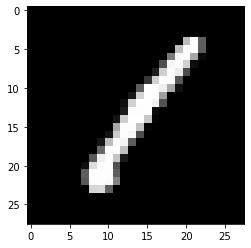

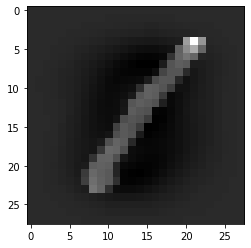

In [7]:
drawImg(X[0])
drawImg(X_S[0])

In [8]:
from sklearn.model_selection import train_test_split #splitting for knn

x_train,x_test,y_train,y_test=train_test_split(X_S, Y,test_size=0.3,random_state=1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

ac_score = []
for k in range(3,10,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_predict=knn.predict(x_test)
    accuracy = accuracy_score(knn_predict, y_test)
    ac_score.append(accuracy)
    print("Accuracy: ",accuracy,"for k= ",k)
    print("Confusion Matrix:\n", confusion_matrix(knn_predict,y_test))
    print("\n---------------\n")

#time taken:50.55s

In [ ]:
ac_score

In [ ]:
plt.plot(range(3,10,2), ac_score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy_score')
plt.show()

In [ ]:
#since we got maximum accuracy for k=5
from sklearn.neighbors import KNeighborsClassifier
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train, y_train)
knn5_predict=knn5.predict(x_test)
accuracy_knn5 = accuracy_score(knn5_predict, y_test)
accuracy_knn5
#time taken:16.14s

In [ ]:
from sklearn.model_selection import cross_val_score
#ten fold cross validation
#model with k=5 is giving highest accuracy


score=cross_val_score(knn5,X_S,Y,cv=10)
#time taken:62s

In [ ]:
score , score.mean()

In [ ]:
confusion_matrix(knn5_predict,y_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(knn5_predict, y_test)

In [ ]:
knn_predict_final = knn5.predict(test)

In [ ]:
knn_predict_final

In [ ]:
# VERIFYING
drawImg(test[-2])
knn_predict_final[-2]

# # KNN USING CENTROIDS(BALL TREE ALGORITHM)

In [ ]:
from sklearn.model_selection import train_test_split #splitting for knn(ball tree)

x_train,x_test,y_train,y_test=train_test_split(X_S,Y,test_size=0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree')
knn.fit(x_train, y_train)

knn_predict=knn.predict(x_test)
accuracy_knn = accuracy_score(knn_predict, y_test)
#time taken: 431s

In [ ]:
accuracy_knn

In [ ]:
from sklearn.model_selection import cross_val_score
#ten fold cross validation
#model with k=5 is giving highest accuracy

score=cross_val_score(knn,X_S,Y,cv=10)
#time taken:2300s

In [ ]:
score.mean()

In [ ]:
knn_b=knn.predict(test)

In [ ]:
drawImg(test[5])
knn.predict(test)[5]

# **** SVM CLASSIFIER****

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_S,Y,train_size=0.8,random_state=1) #splitting for svm_linear

type(x_train),type(x_test),type(y_train),type(y_test)

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

x_pred = model_linear.predict(x_test)
#time taken:105.142s

In [ ]:
x_pred

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(x_pred,y_test), accuracy_score(x_pred,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
#ten fold cross validation

svm_cv_score=cross_val_score(model_linear,X_S,Y,cv=10)
#1211s

In [ ]:
svm_cv_score, svm_cv_score.mean()

In [ ]:
svm_linear_predict=model_linear.predict(test)
# 69s

In [ ]:
svm_linear_predict

In [ ]:
drawImg(test[-3])
svm_linear_predict[-3]

# # # SVM (KERNEL =RBF)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_S,Y,train_size=0.8,random_state=1) #splitting for svm_rbf

type(x_train),type(x_test),type(y_train),type(y_test)

In [ ]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_train,y_train)

x_rbf_pred = model_rbf.predict(x_test)
x_rbf_pred
#time taken:204s

In [ ]:
confusion_matrix(x_rbf_pred,y_test), accuracy_score(x_rbf_pred,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
#ten fold cross validation
#model with k=5 is giving highest accuracy

score=cross_val_score(model_rbf,X_S,Y,cv=10)
#1290s

In [ ]:
score

In [ ]:
svm_rbf_predict=model_rbf.predict(test)
#time taken:204s

In [ ]:
svm_rbf_predict

In [ ]:
drawImg(test[2])
svm_rbf_predict[2]

# # # # DECISION TREE CLASSIFIER


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_S,Y,train_size=0.8,random_state=1) #splitting for decision tree

type(X_train),type(X_test),type(Y_train),type(Y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(criterion="entropy",random_state=1)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
acc_dt=accuracy_score(Y_test, Y_pred)
#9.51s

In [ ]:
acc_dt

#grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(1,15,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'],
    'max_features' : ['auto','log2'], 
}

grid_search = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1,verbose=2)
grid_search.fit(X_train,Y_train)
best_parameters = grid_search.best_params_
print(best_parameters)


dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =13,max_features="auto", min_samples_leaf= 3, min_samples_split= 4, splitter ='best')
dt_clf.fit(x_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score

dt_cv_score=cross_val_score(classifier,X_S,Y,cv=10)

In [ ]:
dt_cv_score

In [ ]:
dt_cv_score.mean()

In [ ]:
dt_final = classifier.predict(test)
dt_final

In [ ]:
drawImg(test[-2])
dt_final[-2]

# RANDOM FOREST CLASSIFIER

In [9]:
X_train_rf,X_test_rf,Y_train_rf,Y_test_rf = train_test_split(X_S,Y,train_size=0.8,random_state=1) #splitting for Random Forest

type(X_train_rf),type(X_test_rf),type(Y_train_rf),type(Y_test_rf)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier()
rfcl=rfcl.fit(X_train_rf,Y_train_rf)
#time taken:18s

In [12]:
y_pred = rfcl.predict(X_test_rf)
y_pred

array([1, 5, 2, ..., 8, 8, 8], dtype=int64)

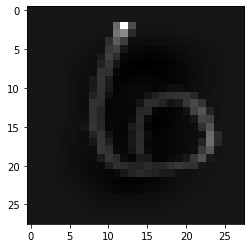

6

In [13]:
drawImg(X_test_rf[-4])
y_pred[-4]

In [14]:
accuracy_score(y_pred,Y_test_rf)

0.9632142857142857

In [ ]:
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfcl, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train_rf,Y_train_rf)

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfcl_grid=RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200)
rfcl_grid=rfcl_grid.fit(X_train_rf,Y_train_rf)

In [ ]:
y_pred_grid = rfcl.predict(X_test_rf)
y_pred_grid

In [ ]:
accuracy_score(y_pred_grid,Y_test_rf)

In [ ]:
from sklearn.model_selection import cross_val_score

rfcl_cv_score=cross_val_score(rfcl,X_S,Y,cv=10)
#time taken:203s

In [ ]:
rfcl_cv_score, rfcl_cv_score.mean()

In [ ]:
confusion_matrix(y_pred,Y_test_rf)

In [ ]:
rfcl_final = rfcl.predict(test)#we should also normalize test .
rfcl_final

In [ ]:
result = rfcl_final #creating the submission.csv

result = pd.Series(result,name="Label_pred")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "Image_Serial"),result],axis = 1)

submission=submission.to_csv("submission.csv",index=False)

In [ ]:
drawImg(test[500])
rfcl_final[500]

In [ ]:
drawImg(test[0])
rfcl_final[0]

In [ ]:
drawImg(test[642])
rfcl_final[642]

In [ ]:
drawImg(test[10005])
rfcl_final[10005]